## ᗜˬᗜ Detector de Fumos con YOLOv11s en Google Colab

In [1]:
# Descomprimimos el archivo ZIP que contiene las imágenes y etiquetas exportadas desde Label Studio
!unzip -q /content/data.zip -d /content/data

In [2]:
# Dividir dataset en entrenamiento y validación (90/10)
import os, shutil, random
from tqdm import tqdm

src_dir     = '/content/data'          # Donde ya descomprimiste images/ y labels/
dest_folder = '/content/fumo_dataset'  # Carpeta destino organizada
split_ratio = 0.9                      # 90% train, 10% val
seed_val    = 123                      # semilla para reproducibilidad (puedes elegir otro)

# Rutas de salida
train_imgs = os.path.join(dest_folder, 'train', 'images')
train_lbls = os.path.join(dest_folder, 'train', 'labels')
val_imgs   = os.path.join(dest_folder, 'val',   'images')
val_lbls   = os.path.join(dest_folder, 'val',   'labels')

# Crear carpetas
for path in [train_imgs, train_lbls, val_imgs, val_lbls]:
    os.makedirs(path, exist_ok=True)

# Listar todas las imágenes
all_files = [f for f in os.listdir(os.path.join(src_dir,'images'))
             if f.lower().endswith(('.png','.jpg','.jpeg'))]
random.seed(seed_val)
random.shuffle(all_files)

# Dividir
split_index = int(len(all_files) * split_ratio)
train_files = all_files[:split_index]
val_files   = all_files[split_index:]

# Copiar a destino
for subset, file_list in zip(['train','val'], [train_files, val_files]):
    for fname in tqdm(file_list, desc=f'Copiando {subset}'):
        # Imagen
        shutil.copy(
            os.path.join(src_dir,'images', fname),
            os.path.join(dest_folder, subset, 'images', fname)
        )
        # Etiqueta
        label_name = os.path.splitext(fname)[0] + '.txt'
        shutil.copy(
            os.path.join(src_dir,'labels', label_name),
            os.path.join(dest_folder, subset, 'labels', label_name)
        )

Copiando val: 100%|██████████| 36/36 [00:00<00:00, 4415.70it/s]


In [3]:
# Instalamos la librería Ultralytics
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [4]:
# Importamos las librerías necesarias
import yaml
import os

# Función para crear automáticamente el archivo de configuración data.yaml
def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Verificamos que exista el archivo de clases
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
    # Leemos las clases desde el archivo
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)
# Creamos el diccionario de configuración
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }
# Guardamos el archivo YAML
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return
# Ruta al archivo de clases y al YAML que se va a crear
path_to_classes_txt = '/content/data/classes.txt'
path_to_data_yaml = '/content/data.yaml'
# Llamamos a la función para crear el archivo
create_data_yaml(path_to_classes_txt, path_to_data_yaml)
# Mostramos el contenido generado del YAML
print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 1
names:
- Fumo


In [5]:
%%bash
cat <<EOF > /content/data.yaml
path: /content/fumo_dataset
train: train/images
val:   val/images

nc: 1
names: ['Fumo']
EOF

In [6]:
# Entrenamos el modelo YOLO con los datos preparados
# Puedes ajustar los parámetros: modelo, epochs, imgsz (resolución)
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 230MB/s]
Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, i

In [9]:
# Ejecutamos predicciones sobre las imágenes de validación y guardamos los resultados
!yolo detect predict model=runs/detect/train/weights/best.pt source=fumo_dataset/val/images save=True

Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/36 /content/fumo_dataset/val/images/01050eeb-images_127.jpeg: 640x640 1 Fumo, 15.6ms
image 2/36 /content/fumo_dataset/val/images/0616b323-images_96.jpeg: 640x640 1 Fumo, 15.6ms
image 3/36 /content/fumo_dataset/val/images/084f8f9f-6f107f64-6d53-40a3-88eb-aac8895578b2-b1e9f440aecdbdb356d3b23.jpeg: 640x640 1 Fumo, 15.6ms
image 4/36 /content/fumo_dataset/val/images/220eac13-images_236.jpeg: 480x640 1 Fumo, 46.8ms
image 5/36 /content/fumo_dataset/val/images/352f96d4-61H85Pg6u-L-_AC_UF894-1000_QL80_.jpg: 640x640 1 Fumo, 16.2ms
image 6/36 /content/fumo_dataset/val/images/37401fd3-images_74.jpeg: 640x480 1 Fumo, 43.1ms
image 7/36 /content/fumo_dataset/val/images/52c18873-images_91.jpeg: 640x608 1 Fumo, 46.2ms
image 8/36 /content/fumo_dataset/val/images/635112dd-images_54.jpeg: 480x640 1 Fumo, 13.0ms
image 9/36 /content/f

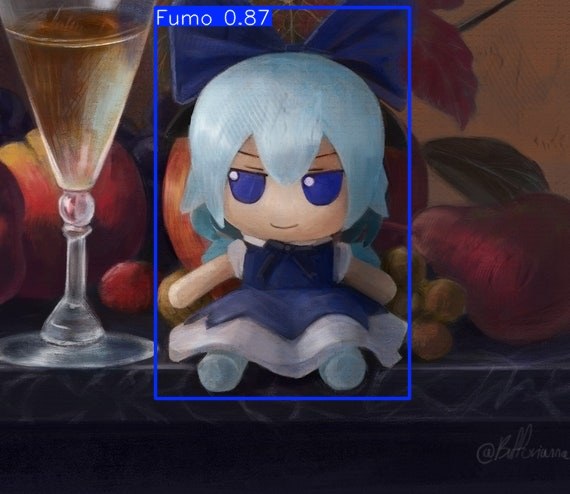

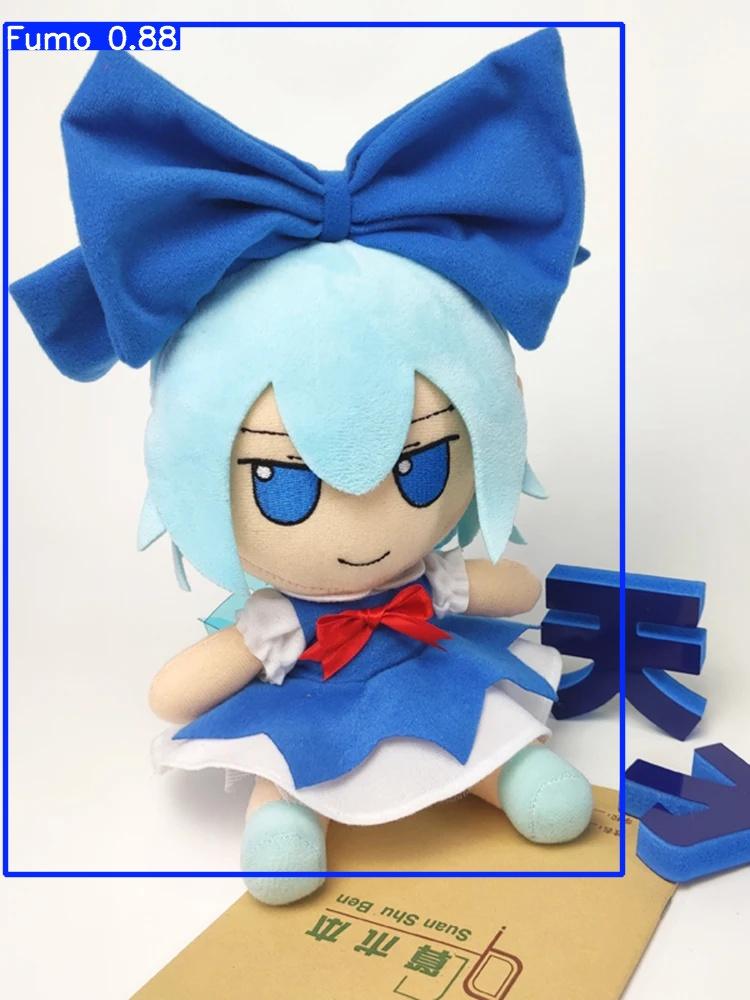

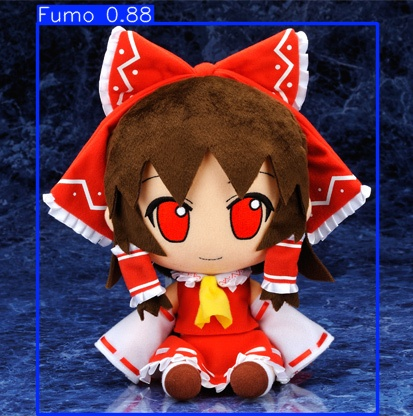

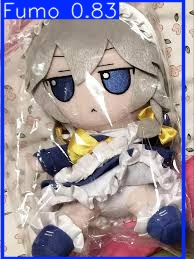

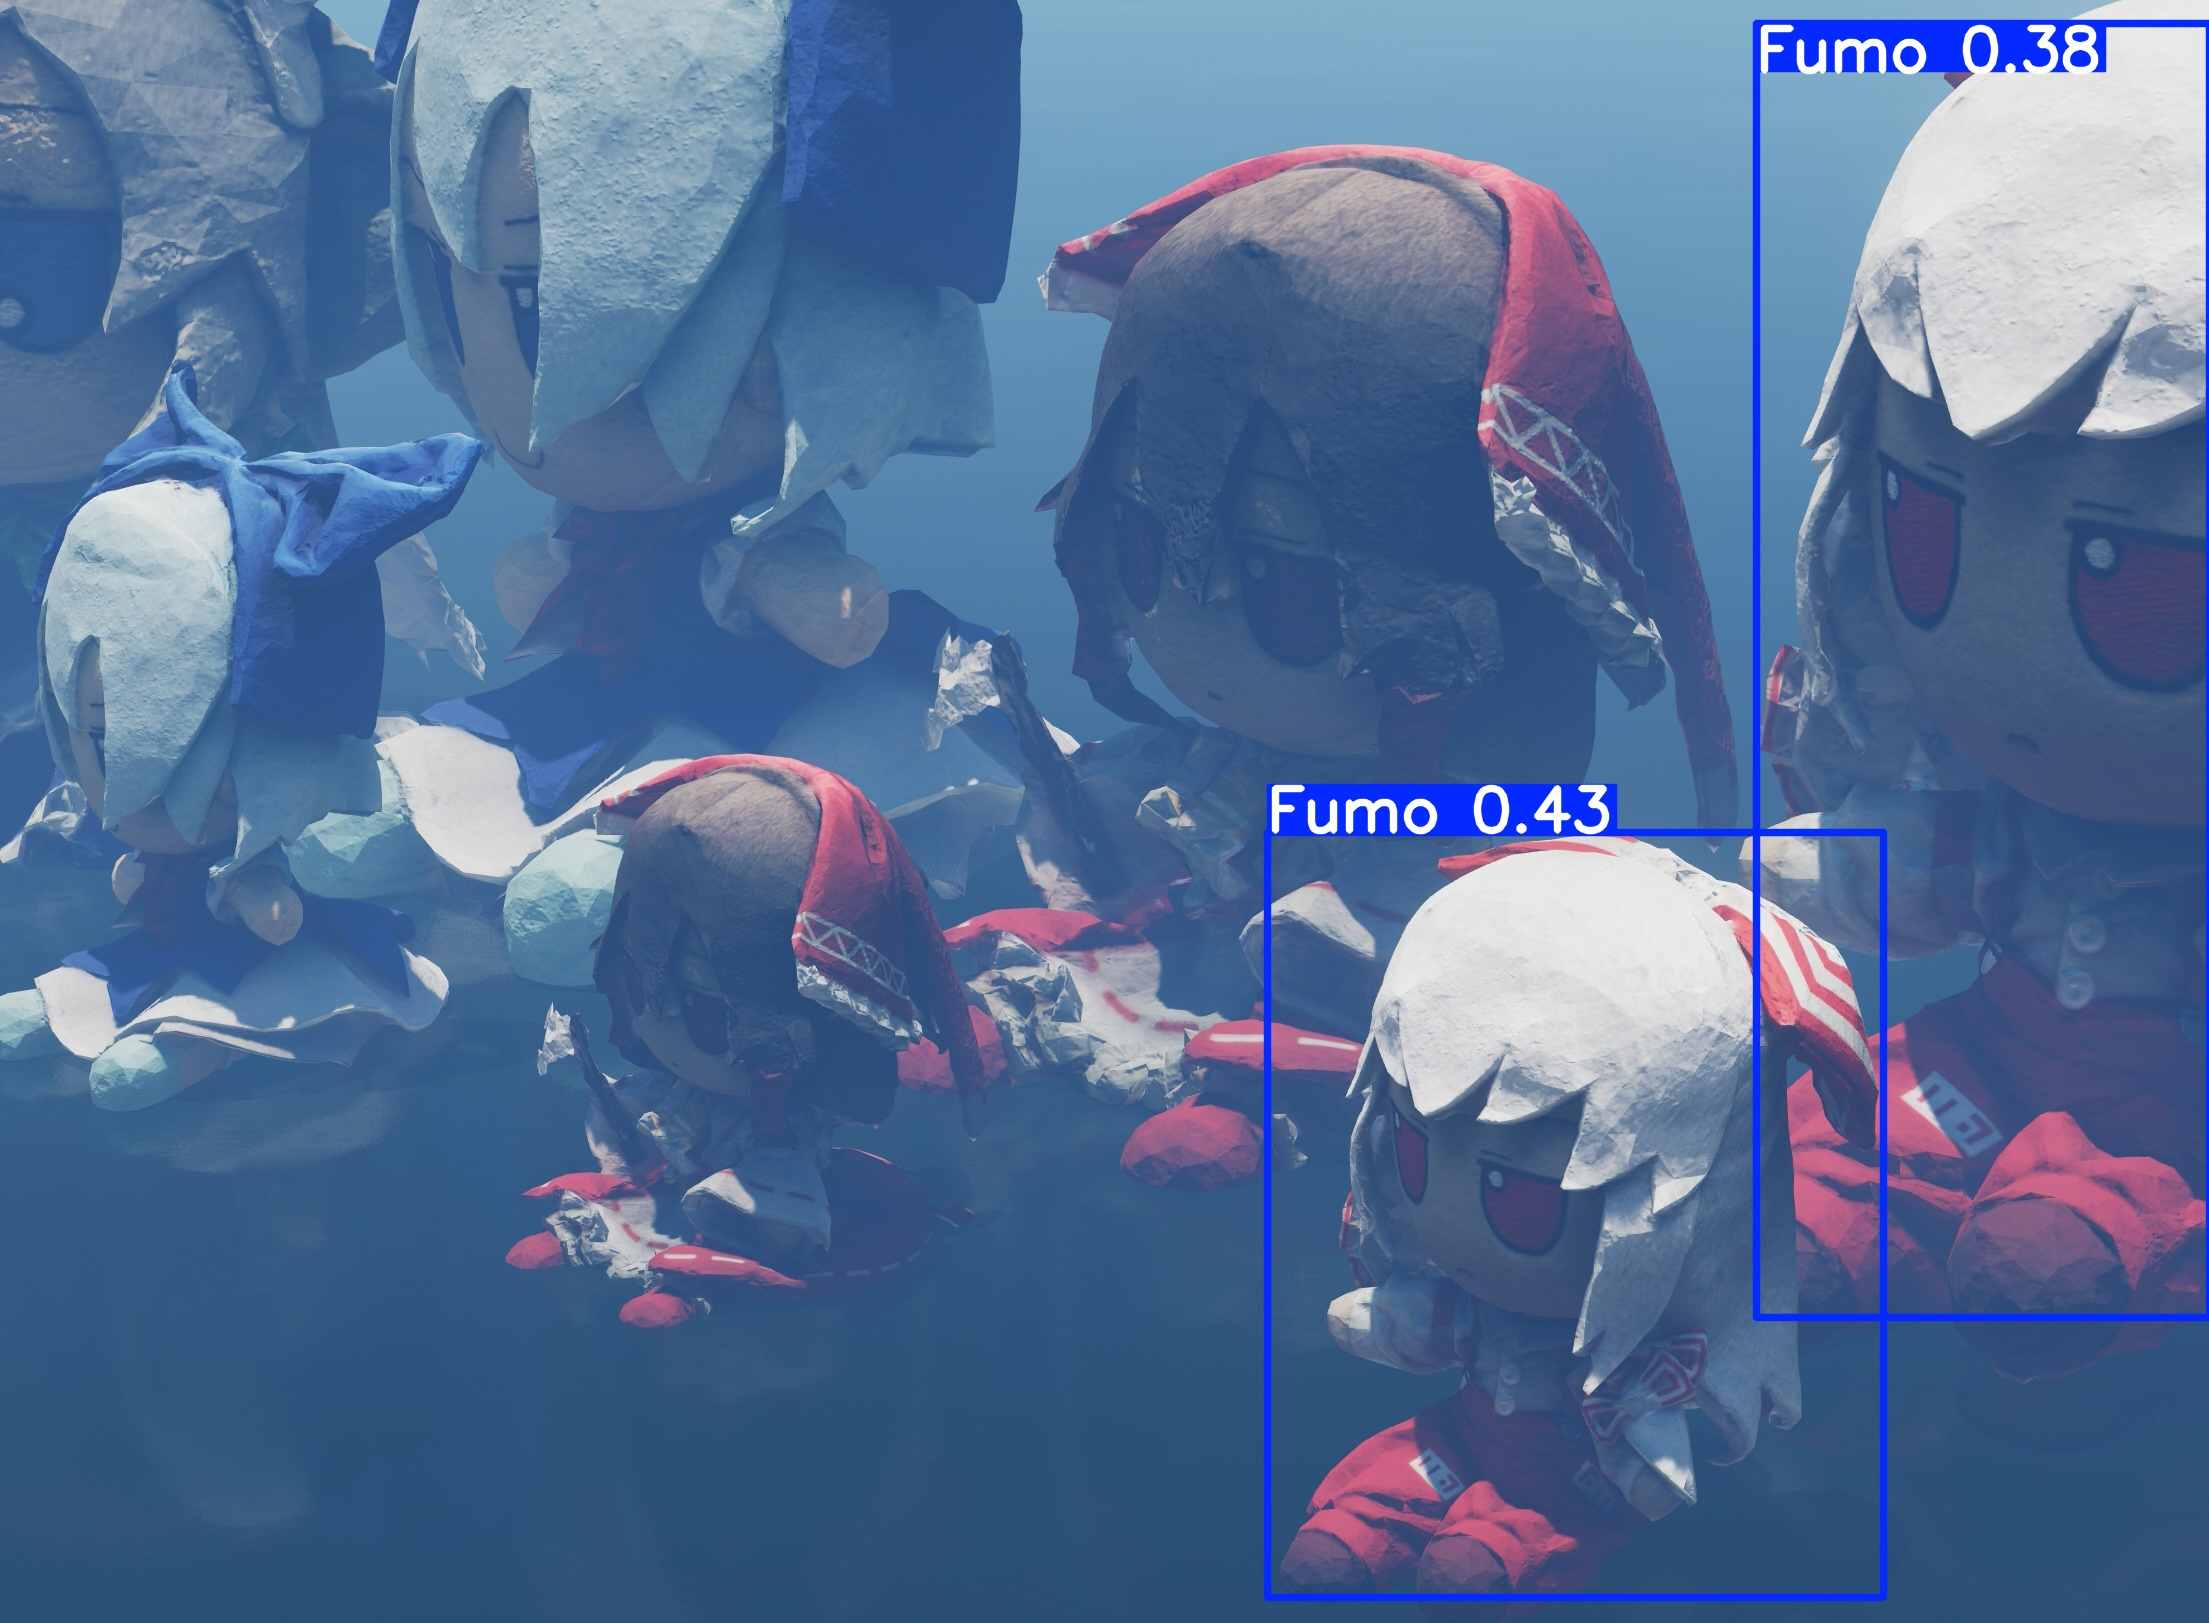

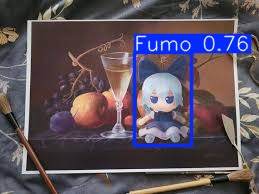

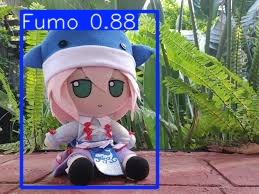

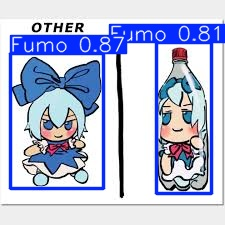

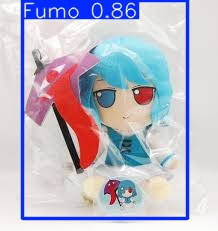

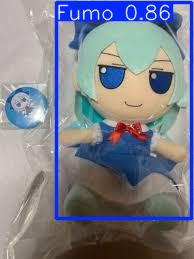

In [10]:
# Mostramos las primeras 10 imágenes con resultados de predicción
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [11]:
# Creamos una carpeta para guardar el modelo final y sus resultados
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model
# Nos movemos a la carpeta del modelo y la comprimimos como un ZIP
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/val_batch0_pred.jpg (deflated 13%)
  adding: train/val_batch0_labels.jpg (deflated 14%)
  adding: train/R_curve.png (deflated 17%)
  adding: train/F1_curve.png (deflated 17%)
  adding: train/args.yaml (deflated 53%)
  adding: train/train_batch1.jpg (deflated 6%)
  adding: train/val_batch1_labels.jpg (deflated 17%)
  adding: train/train_batch1002.jpg (deflated 11%)
  adding: train/results.csv (deflated 60%)
  adding: train/labels_correlogram.jpg (deflated 42%)
  adding: train/train_batch1000.jpg (deflated 13%)
  adding: train/confusion_matrix.png (deflated 41%)
  adding: train/train_batch1001.jpg (deflated 7%)
  adding: train/train_batch0.jpg (deflated 9%)
  adding: train/train_batch2.jpg (deflated 7%)
  adding: train/confusion_matrix_normalized.png (deflated 39%)
  adding: train/val_batch1_pred.jpg (deflated 17%)
  adding: train/labels.jpg (deflated 32%)
  adding: train/results.png (defla